In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds, info = tfds.load('beans', with_info=True)

### image visualization

In [3]:
def images(num=25):
    rows = num // 5
    plt.figure(figsize=(10, rows * 2))
    i = 1
    for d in ds["train"].take(rows*5):
        plt.subplot(rows, 5, i)
        plt.imshow(d["image"])
        plt.axis(False)
        plt.grid(False)
        plt.title(d["label"].numpy())
        i += 1

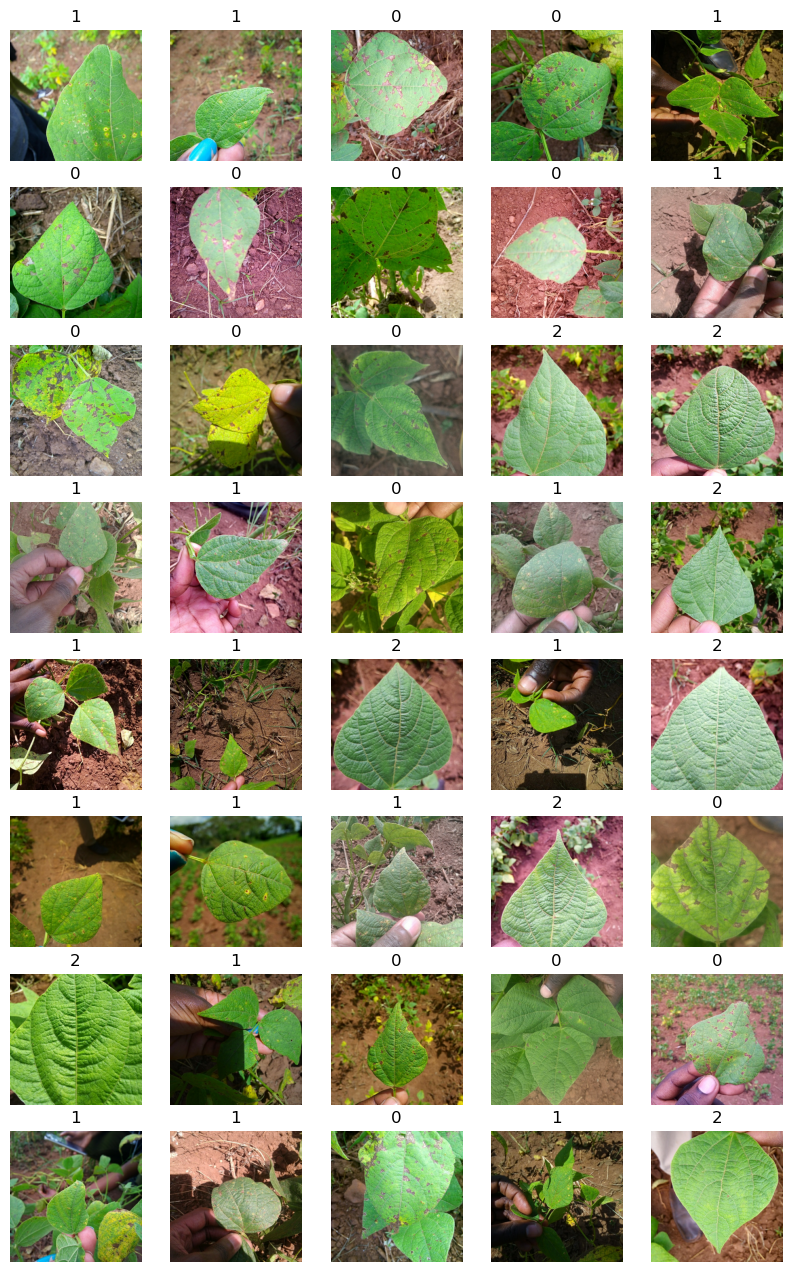

In [4]:
images(40)

### Modelling

#### Model 1

In [6]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential

In [ ]:
model_1 = Sequential([
    layers.Conv2D(32, 7, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Conv2D(64, 5, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Conv2D(128, 3, activation='relu'), 
    layers.MaxPool2D(2), 
    layers.Flatten(), 
    layers.Dense(1024, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(16, activation='relu'), 
    layers.Dense(3, activation='softmax')
])
model_1.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model_1.fit(ds['train'], )